In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 50)
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
df = pd.read_csv('../clean_data/clean_victimization_data.csv')
df.head(1)
df.dtypes

Year                                         int64
Weight                                     float64
Sex                                         object
Race                                        object
Hispanic origin                             object
Race/Hispanic origin                        object
Age                                         object
Marital status                              object
Household income                            object
Population size                             object
Region                                      object
Location of residence                       object
Victim-offender relationship                object
Reporting to the police                     object
Presence of Weapon                          object
Presence of weapon                          object
Aggregate type of crime                     object
Type of crime                               object
Violent crime excluding simple assault      object
Injury                         

In [4]:
df.corr(method ='pearson')

,Year,Weight
Year,1.000000,-0.058092
Weight,-0.058092,1.000000


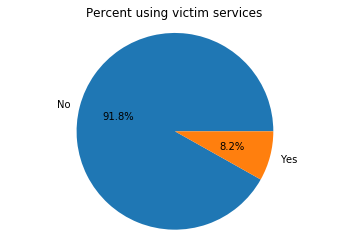

In [5]:
# let's make a pie chart over how many victims received Victim Services

dv = {'No services received from victim service agencies': 'No', 'Services received from victim service agencies': 'Yes'}
df = df.replace({'Victim services': dv})
df.head()
df.dtypes

df = df.rename(columns={"Weight": ""})

df_g = df.groupby(df['Victim services']).count()

df_g.head()

plot = df_g.plot.pie(y='', labels=df_g.index, legend=False, autopct='%1.1f%%')
plt.title("Percent using victim services")
plt.axis("equal")
plt.savefig('victim_services')
plt.show()

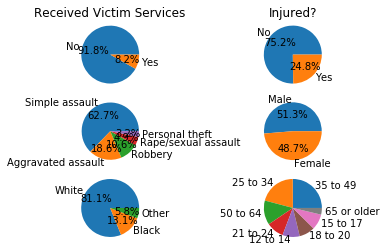

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# subplots
#%matplotlib inline

sv = df['Victim services'].value_counts()
si = df['Injury'].value_counts()
st = df['Type of crime'].value_counts()
sx = df['Sex'].value_counts()
sr = df['Race'].value_counts()
sa = df['Age'].value_counts()

# create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

# plot each pie chart in a separate subplot
plt.figure(0)
ax1.set_title('Received Victim Services')
ax1.pie(sv, labels=['No', 'Yes'], autopct='%1.1f%%')
ax1.axis('equal')

plt.figure(1)
ax2.set_title('Injured?')
ax2.pie(si, labels=['No', 'Yes'], autopct='%1.1f%%')
ax2.axis('equal')

plt.figure(2)
ax3.pie(st, labels=st.index, autopct='%1.1f%%')
ax3.axis('equal')

plt.figure(3)
ax4.pie(sx, labels=sx.index, autopct='%1.1f%%')
ax4.axis('equal')

plt.figure(4)
ax5.pie(sr, labels=sr.index, autopct='%1.1f%%')
ax5.axis('equal')

plt.figure(5)
ax6.pie(sa, labels=sa.index)
ax6.axis('equal')

plt.savefig("pie_charts")
plt.show()




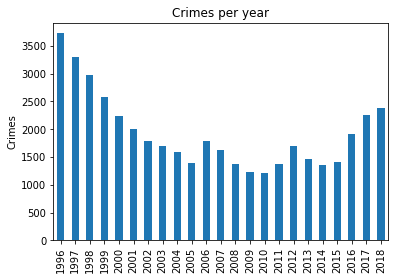

In [15]:

year_s = df['Year'].value_counts()
year_s = year_s.sort_index()
year_s = year_s.drop(year_s.index[0])
year_s

year_s.plot.bar()
plt.title('Crimes per year')
plt.ylabel('Crimes')

plt.savefig("crimes_per_year")
plt.show()